In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None
)

df_wine.columns = ['Class label', 'Alcohol',
 'Malic acid', 'Ash',
 'Alcalinity of ash', 'Magnesium',
 'Total phenols', 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

### Extracting principal components step by step

* Standardizing the data
* Constructing the covariance matrix
* Obtaining the eigenvalues and eigenvectors of the covariance matrix
* Sorting the eigenvalues by decreasing order to rank the eigenvectors

In [97]:
X, y = df_wine.iloc[:, 1: ].values, df_wine.iloc[:, 0].values 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [99]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [100]:
import numpy as np

cov_mat = np.cov(X_train_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print(f'\n Eigen values \n{eigen_vals}')


 Eigen values 
[4.8427 2.416  1.5485 0.9612 0.8417 0.6621 0.5183 0.3465 0.3131 0.1075
 0.2136 0.1536 0.1809]


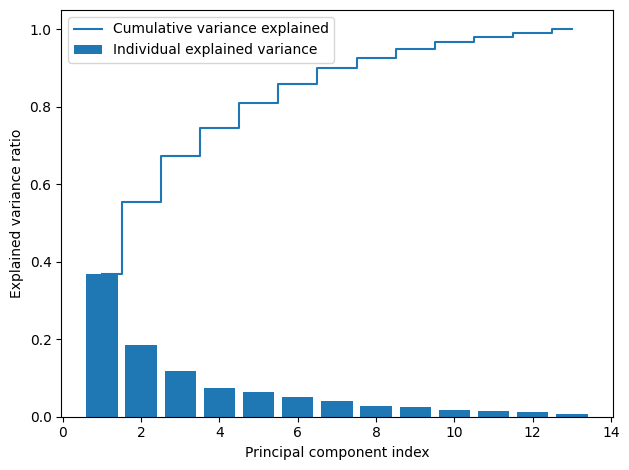

In [101]:
tot = sum(eigen_vals)

var_exp = [i/tot for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt



plt.bar(range(1, 14), var_exp, align='center', 
        label ='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative variance explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [102]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [103]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print(f'Matrix W:\n {W}')

Matrix W:
 [[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


In [104]:
X_train_std[0].dot(W)

array([2.383 , 0.4546])

In [105]:
X_train_pca = X_train_std.dot(W)

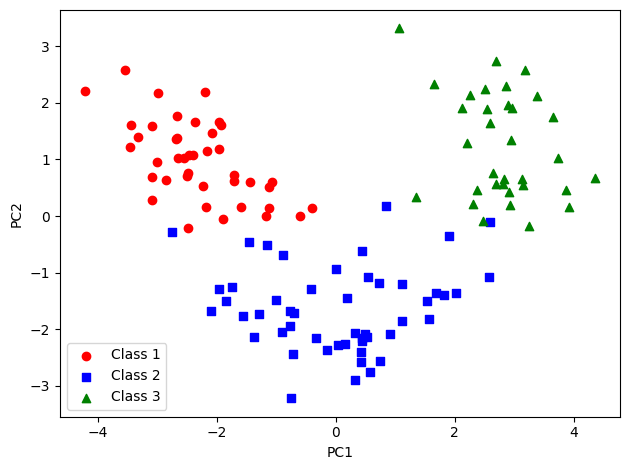

In [106]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_pca[y_train == l, 0],
        X_train_pca[y_train == l, 1],
        marker=m, c=c, label=f'Class {l}'
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

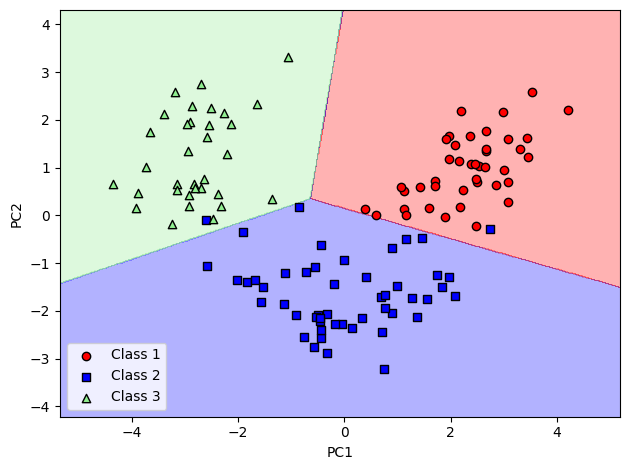

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from helpers.utils import plot_decision_regions

pca = PCA(n_components=2)

lr = LogisticRegression( solver='lbfgs', random_state=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


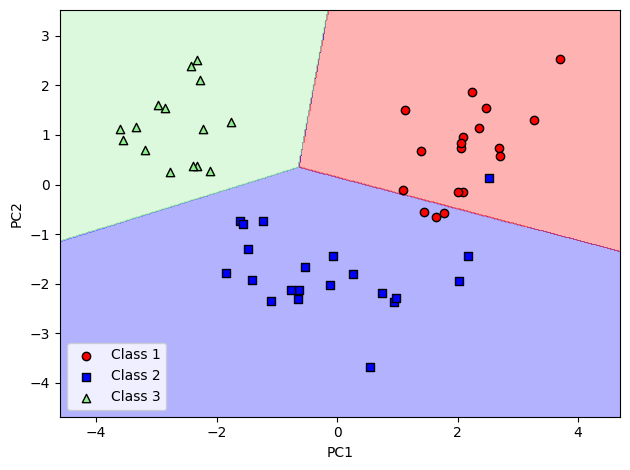

In [108]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [109]:
pca = PCA(n_components=None)
pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

In [110]:

loadings = eigen_vecs * np.sqrt(eigen_vals)

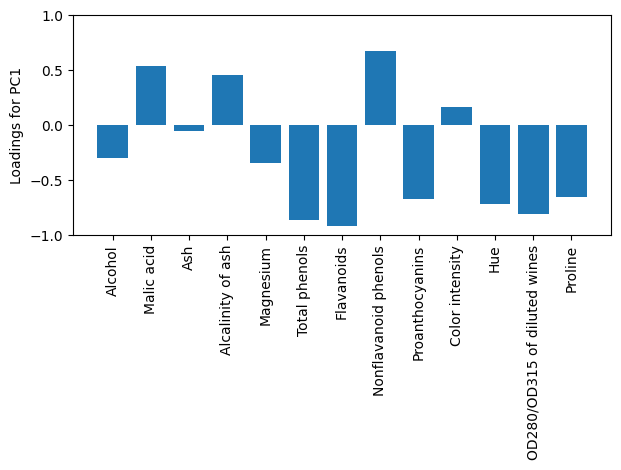

In [111]:
fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

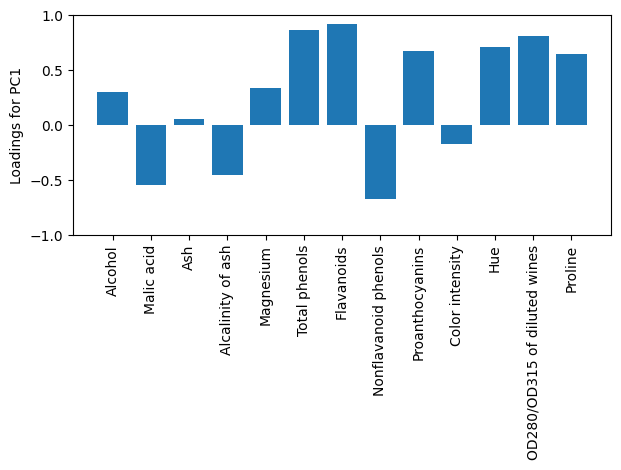

In [112]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()


### Linear discriminant analysis

* Standardize the $d$-dimensional dataset ($d$ is the number of features).
* For each class, compute the $d$-dimensional mean vector.
* Construct the between-class scatter matrix $S_B$ and the within-class scatter matrix $S_W$.
* Compute the eigenvectors and corresponding eigenvalues of $S_W^{-1}S_B$.
* Sort the eigenvalues in decreasing order to rank the corresponding eigenvectors.
* Choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues to construct the $d \times k$ transformation matrix $W$ (eigenvectors are the columns of $W$).
* Project the samples onto the new feature subspace using the transformation matrix $W$.

#### LDA Formulation (matching the steps above)

Let the training set be $\{(\mathbf{x}_i, y_i)\}_{i=1}^{N}$ with $C$ classes and feature dimension $d$.

1. **Standardize features**
   - Work with standardized vectors $\mathbf{x}_i \in \mathbb{R}^d$.

2. **Compute class mean vectors**
   - For class $k \in \{1,\dots,C\}$ with $N_k$ samples:
   $$
   \boldsymbol{\mu}_k = \frac{1}{N_k}\sum_{\mathbf{x}_i \in D_k}\mathbf{x}_i
   $$

3. **Compute overall mean vector**
   $$
   \boldsymbol{\mu} = \frac{1}{N}\sum_{i=1}^{N}\mathbf{x}_i
   $$

4. **Construct within-class scatter matrix**
   $$
   \mathbf{S}_W = \sum_{k=1}^{C}\sum_{\mathbf{x}_i \in D_k}(\mathbf{x}_i-\boldsymbol{\mu}_k)(\mathbf{x}_i-\boldsymbol{\mu}_k)^T
   $$

5. **Construct between-class scatter matrix**
   $$
   \mathbf{S}_B = \sum_{k=1}^{C} N_k(\boldsymbol{\mu}_k-\boldsymbol{\mu})(\boldsymbol{\mu}_k-\boldsymbol{\mu})^T
   $$

6. **Solve generalized eigenvalue problem**
   $$
   \mathbf{S}_W^{-1}\mathbf{S}_B\mathbf{w}_j = \lambda_j\mathbf{w}_j
   $$

7. **Sort and select top components**
   - Sort eigenpairs $(\lambda_j, \mathbf{w}_j)$ by descending $\lambda_j$.
   - Keep top $m$ eigenvectors ($m \le C-1$):
   $$
   \mathbf{W} = [\mathbf{w}_1,\dots,\mathbf{w}_m] \in \mathbb{R}^{d\times m}
   $$

8. **Project data to LDA subspace**
   $$
   \mathbf{z}_i = \mathbf{W}^T\mathbf{x}_i
   $$

In [113]:
np.set_printoptions(precision=4)

mean_vecs = []

for label in range (1, 4):
    mean_vecs.append(
        np.mean(X_train_std[y_train == label], axis=0)
    )
    print(f'MV  {mean_vecs[label -1]}\n')

MV  [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV  [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV  [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [114]:
d = 13
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))

    for row in X_train_std[y_train == label]:

        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter  += (row - mv).dot((row - mv).T)

    S_W += class_scatter

print('Within-class scatter matrix: '
      f'{S_W.shape[0]} x {S_W.shape[1]}')

Within-class scatter matrix: 13 x 13


In [115]:
print('Class label distribution: ',
      
      np.bincount(y_train)[1:])

Class label distribution:  [41 50 33]


In [121]:
d = 13 
S_W = np.zeros((d, d))

for label in range(1, 4):
    X_class = X_train_std[y_train == label]
    class_scatter = np.cov(X_class.T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: '
      f'{S_W.shape[0]} x {S_W.shape[1]}')

Scaled within-class scatter matrix: 13 x 13


In [122]:
mean_overall = np.mean(X_train_std, axis=0)
print(mean_overall)
mean_overall = mean_overall.reshape(d, 1)
print('\n', mean_overall)

[ 6.8901e-15  1.6832e-16  3.7997e-15  2.8561e-16 -3.1785e-16  1.6626e-15
  1.5982e-16 -1.1989e-15  1.8883e-15 -1.6152e-15 -5.7839e-16  8.6311e-16
 -1.3341e-16]

 [[ 6.8901e-15]
 [ 1.6832e-16]
 [ 3.7997e-15]
 [ 2.8561e-16]
 [-3.1785e-16]
 [ 1.6626e-15]
 [ 1.5982e-16]
 [-1.1989e-15]
 [ 1.8883e-15]
 [-1.6152e-15]
 [-5.7839e-16]
 [ 8.6311e-16]
 [-1.3341e-16]]


In [118]:
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs, 1):

    n = X_train_std[y_train == i, :].shape[0]

    mean_vec = mean_vec.reshape(d, 1)

    S_B += n * (mean_vec - mean_overall).dot(
        (mean_vec - mean_overall).T)
print('Between-class scatter matrix: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


In [123]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [124]:
eigen_pairs = [
    (np.abs(eigen_vals[i]), eigen_vecs[:, i])
     for i in range(len(eigen_vals))
]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

for eigen_val in eigen_pairs:
    print(eigen_val[0])

349.617808905994
172.76152218979382
2.7905434564890647e-14
2.736061413582339e-14
2.736061413582339e-14
2.1843470083407988e-14
1.8136771261205975e-14
1.8136771261205975e-14
1.435931167587541e-14
1.435931167587541e-14
5.023701006635386e-15
2.335354240931274e-15
0.0


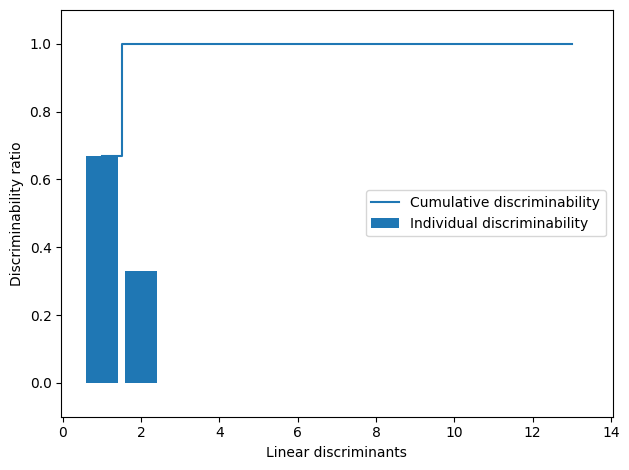

In [125]:
tot = sum(eigen_vals.real)

discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]

cum_dicr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_dicr, where='mid', label='Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [127]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))

print(f'Matrix w:\n {W}')

Matrix w:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


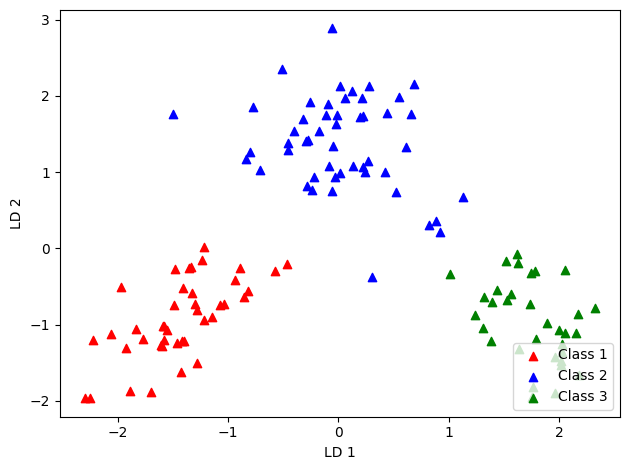

In [128]:
X_train_lda = X_train_std.dot(W)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, marker in zip(np.unique(y_train), colors, markers ):
    plt.scatter(
        X_train_lda[y_train == l, 0],
        X_train_lda[y_train == l, 1],
        c=c, label=f'Class {l}', marker=m
    )

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_std, y_train)


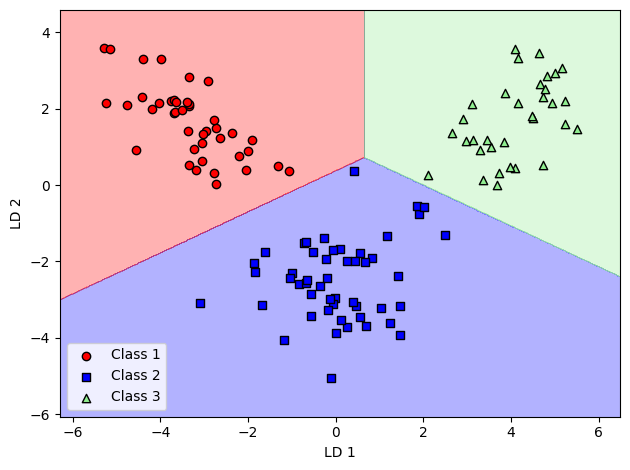

In [132]:
lr = LogisticRegression(solver='lbfgs', random_state=1)

lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

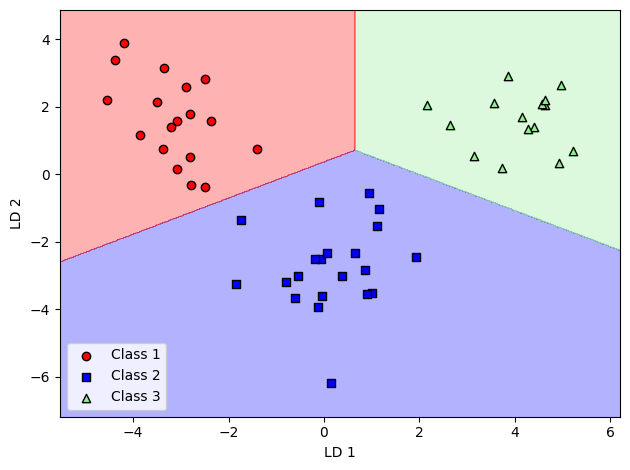

In [133]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [134]:
# Nonlinear dimensionality reduction techniques for data visualization 
# Nanifold learning
# TSNE 

from sklearn.datasets import load_digits

In [135]:
digits = load_digits()

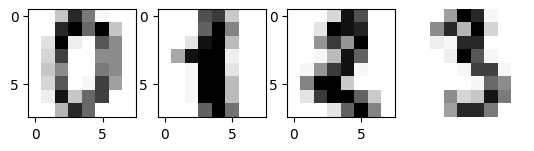

In [149]:
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.axis('off')
plt.show()

In [150]:
digits.data.shape

(1797, 64)

In [151]:
y_digits = digits.target
X_digits = digits.data

In [152]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=123)

X_digits_tsne = tsne.fit_transform(X_digits)

import matplotlib.patheffects as PathEffects

In [153]:
def plot_projection(x, colors):


    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):

        plt.scatter(x[colors == i, 0],  x[colors == i, 1])


    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)

        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])


    

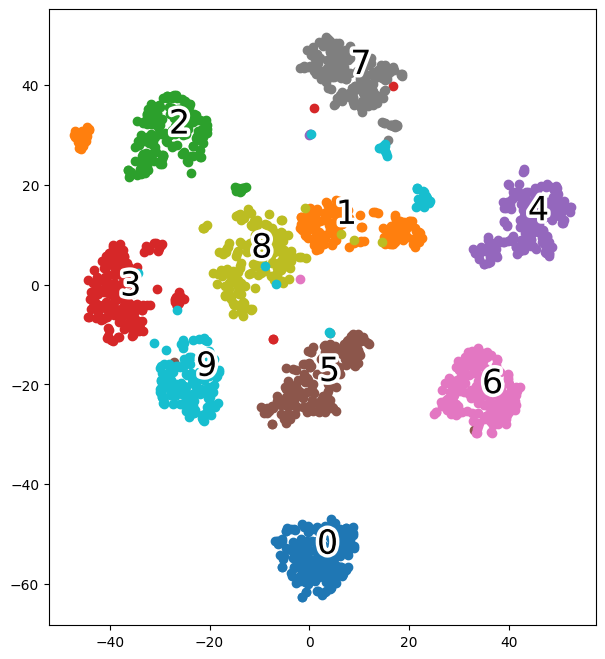

In [154]:
plot_projection(X_digits_tsne, y_digits)
plt.show()